<a href="https://colab.research.google.com/github/saritmaitra/Trading-strategy/blob/master/Brent__trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
!pip install quandl
import quandl
plt.style.use('ggplot')
from statistics import variance 
from random import randint
import scipy as sp
from scipy import stats
!pip install ffn
import ffn

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=1b4e1606e92b5f7cbbc25519b1cdc7b826a7c2965cd55f29bb276ef023beab3f
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22814 sha256=f6645c31ca1b3cdba868f2a1c40e359f4c93dcbc21b1176f57088b8d4223fdbd
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built ffn


/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Continuous Contracts
Individual futures contracts trade for very short periods of time, and are hence unsuitable for long-horizon analysis. Continuous futures contracts solve this problem by chaining together a series of individual futures contracts, to provide a long-term price history that is suitable for trading, behavioral and strategy analysis.

In [7]:
# Natural Gas continuous contract
print('\033[4mBrent Crude Futures, Continuous Contract\033[0m')
BC = quandl.get("CHRIS/ICE_B1", authtoken="LSQpgUzwJRoF667ZpzyL") # natural gas continuous contract 1
BC = BC.loc['2000-01-01':,]

Brent Crude Futures, Continuous Contract


In [ ]:
BC.columns

Index(['Open', 'High', 'Low', 'Settle', 'Change', 'Wave', 'Volume', 'Prev. Day Open Interest', 'EFP Volume', 'EFS Volume', 'Block Volume'], dtype='object')

In [ ]:
BC.shape

(5219, 11)

Open                         61
High                         61
Low                          61
Settle                       61
Change                     1029
Wave                       4060
Volume                       53
Prev. Day Open Interest       1
EFP Volume                 1333
EFS Volume                 2566
Block Volume               1071
dtype: int64




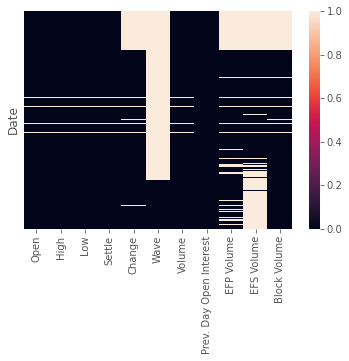

In [ ]:
import seaborn as sns
%matplotlib inline
print(BC.isnull().sum())
sns.heatmap(BC.isnull(), yticklabels = False)
plt.show()

In [8]:
BC.drop(['Change',
        'Wave',
        'Prev. Day Open Interest',
        'EFP Volume',
        'EFS Volume',
        'Block Volume'],
        axis=1, inplace=True)
print(BC.columns)
print('\n')
BC= BC.fillna(method='ffill')
print(BC.isnull().sum())

Index(['Open', 'High', 'Low', 'Settle', 'Volume'], dtype='object')


Open      0
High      0
Low       0
Settle    0
Volume    0
dtype: int64


The data frame will have the index set to dates and the columns are:
- Open: The price of the first trade on the given trading day.
- High: The highest price at which a stock traded for the given trading day.
- Low: The lowest price at which a stock traded for the given trading day.
- Adj Close: According to Yahoo Finance, this is the “the closing price after adjustments for all applicable splits and dividends distributions”.
- Volume: The number of shares traded for the given trading day.

In [ ]:
BC.tail()

,Open,High,Low,Settle,Volume
Date,,,,,
2020-05-11,30.70,31.47,29.35,29.63,238056.0
2020-05-12,30.07,30.70,29.35,29.98,196031.0
2020-05-13,29.35,30.55,28.86,29.19,216546.0
2020-05-14,29.52,31.55,28.88,31.13,220453.0
2020-05-15,31.52,32.91,30.94,32.50,208386.0


In [ ]:
BC.describe()

,Open,High,Low,Settle,Volume
count,5219.000000,5219.000000,5219.000000,5219.000000,5219.000000
mean,64.876808,65.718456,63.984089,64.867737,133425.548573
std,29.883764,30.141488,29.605283,29.904708,107548.257831
min,17.400000,18.050000,15.980000,17.680000,0.000000
25%,40.600000,41.100000,39.795000,40.530000,37846.500000
50%,61.510000,62.570000,60.570000,61.540000,108580.000000
75%,84.565000,85.480000,83.330000,84.555000,209643.500000
max,146.300000,147.500000,144.250000,146.080000,773838.000000


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Ohlc(x=BC.index,
                open=BC['Open'],
                high=BC['High'],
                low=BC['Low'],
                close=BC['Settle']))

fig.update_layout(
    title='Brent Crude Futures, Continuous Contract',
    yaxis_title='Price (USD)'
)
fig.show()

In [ ]:
# Calculate the daily percentage change which is daily return
data = BC["2017":].copy()

print('\033[1m' + 'Daily percentage change:' + '\033[1m')
daily_ret = data['Settle'].pct_change().dropna()
mean_return = daily_ret.mean()
return_stdev = daily_ret.std()
print('Average daily return : %1.2f%% ' % round((mean_return*100),2))
print('Average Volatility : %1.2f%% ' % round((return_stdev*100), 2))

Daily percentage change:
Average daily return : -0.02% 
Average Volatility : 2.80% 


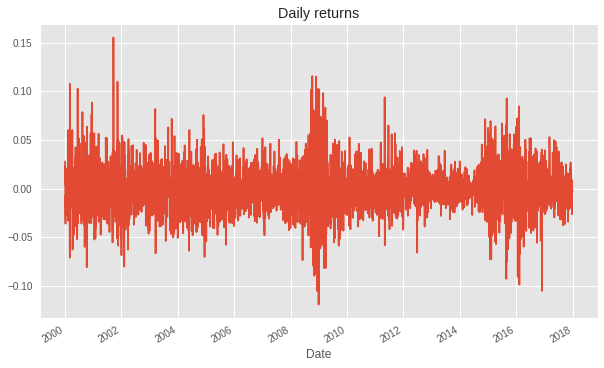

In [ ]:
daily_ret.plot(figsize=(10,6),grid=True)
plt.title('Daily returns')
plt.show()

In [ ]:
perf = data['Settle'].copy().calc_stats()
print('\n')
perf.display()



Stats for Settle from 2017-01-02 00:00:00 - 2020-05-04 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR     Max Drawdown
--------------  --------  -------  --------------
-52.13%            -0.27  -19.82%  -77.60%

Annualized Returns:
mtd    3m       6m       ytd      1y       3y       5y       10y      incep.
-----  -------  -------  -------  -------  -------  -------  -------  --------
2.72%  -49.59%  -56.22%  -58.79%  -61.61%  -17.46%  -19.82%  -19.82%  -19.82%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -0.27    -0.36      -0.46
mean    -11.92%  -13.07%    -18.55%
vol     43.53%   36.58%     40.74%
skew    -0.53    -2.32      0.11
kurt    24.06    8.21       -
best    21.02%   13.09%     22.68%
worst   -24.40%  -46.95%    -58.79%

Drawdowns:
max      avg       # days
-------  ------  --------
-77.60%  -7.22%     54.95

Misc:
---------------  -------
avg. up month    4.77%
avg. down month  -10.8

In [ ]:
perf.stats

start                    2017-01-02 00:00:00
end                      2020-05-04 00:00:00
rf                                         0
total_return                       -0.521295
cagr                               -0.198212
max_drawdown                       -0.775988
calmar                             -0.255431
mtd                                0.0271903
three_month                        -0.495923
six_month                          -0.562208
ytd                                -0.587879
one_year                            -0.61609
three_year                         -0.174621
five_year                          -0.198212
ten_year                           -0.198212
incep                              -0.198212
daily_sharpe                       -0.273801
daily_sortino                      -0.401974
daily_mean                         -0.119175
daily_vol                            0.43526
daily_skew                          -0.52798
daily_kurt                           24.0573
best_day  

In [ ]:
from scipy.stats import normaltest
normaltest(daily_ret)

NormaltestResult(statistic=279.4930872513689, pvalue=2.036325680710966e-61)

In [ ]:
# empirical quantile of daily returns
import scipy.stats
print('\033[4mEmpirical quantile of daily returns\033[0m')
round(daily_ret.quantile(0.05),2)

Empirical quantile of daily returns


-0.04

Critical Values


<IPython.core.display.Javascript object>

t test statistic:  -0.51


P-value is:  1.4


Critical value at α = 0.01 with 251 df:  958.35




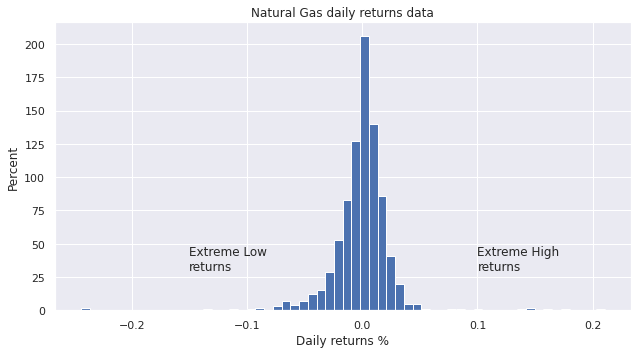



Skewness :  -0.53
Kurtosis :  24.06


In [ ]:
print('\033[4mCritical Values\033[0m')
n = len(daily_ret)
test_statistic = ((daily_ret.mean() - 0) / (daily_ret.std()/np.sqrt(n)))
print ('t test statistic: ', round(test_statistic,2))
print('\n')

from scipy.stats import t
p_val = 2 * (1 - t.cdf(test_statistic, n - 1))
print ('P-value is: ', round(p_val,1))
print('\n')

from scipy.stats import chi2
# Here we calculate the critical value directly because our df is too high for most chisquare tables
crit_value = chi2.ppf(0.99, (n - 1))
print ('Critical value at α = 0.01 with 251 df: ', round(crit_value,2))
print('\n')

# Plot the distributions
fig = plt.figure(figsize=(10,5))
sns.set(rc={'figure.figsize': (15,5)})
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
daily_ret.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Natural Gas daily returns data")
ax1.text(-0.15,30,"Extreme Low\nreturns")
ax1.text(0.10,30,"Extreme High\nreturns")
plt.show()
print('\n')
print("Skewness : ", round(daily_ret.skew(),2))
print("Kurtosis : ", round(daily_ret.kurtosis(),2))

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=3ecbdb2b56149350e906808f320c6d127ac8ba928828d4e094bb6a3d5b2e6a8d
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=2ff7518850295ef48c13771ba5062b93f6553c0f00e1b8bce0f2779c0f759a5c
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


Start date,2017-12-28
End date,2000-01-04
Total months,219
,Backtest
Annual return,-5.4%
Cumulative returns,-63.5%
Annual volatility,34.7%
Sharpe ratio,0.01
Calmar ratio,-0.06
Stability,0.37
Max drawdown,-87.9%


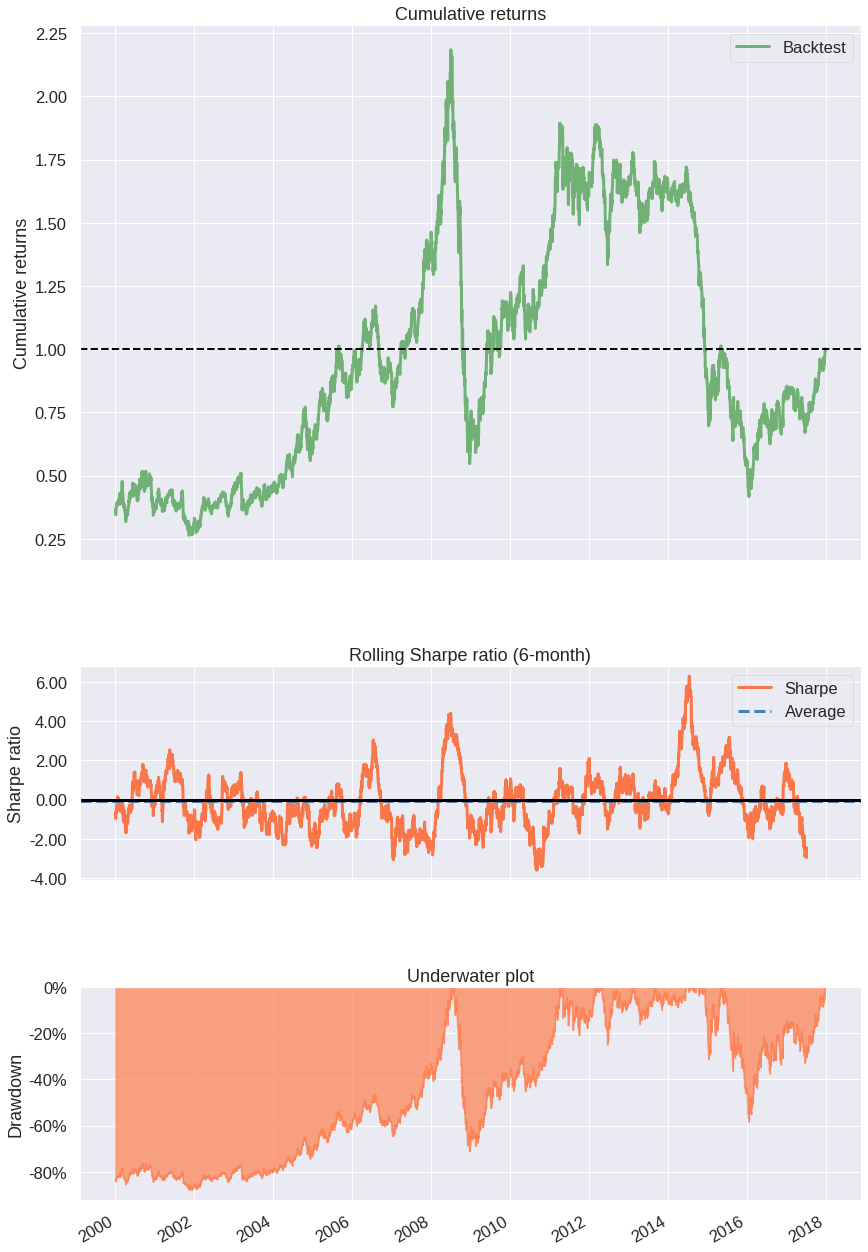

In [ ]:
!pip install pyfolio
import pyfolio as pf
pf.create_simple_tear_sheet(daily_ret)

In [ ]:
print('\033[4mProbability of +/-(1%); +/-(3%); +/-%(5) change in price (Data -> 2017- till date)\033[0m')

print ("The probability of price changes between 1%% and -1%% is %1.2f%% " % 
       (100*daily_ret[(daily_ret > -0.01) & (daily_ret < 0.01)].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes between 3%% and -3%% is %1.2f%% " % 
       (100*daily_ret[(daily_ret > -0.03) & (daily_ret < 0.03)].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes between 5%% and -5%% is %1.2f%% " % 
       (100*daily_ret[(daily_ret > -0.05) & (daily_ret < 0.05)].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes more than 5%% is %1.2f%%" % 
       (100*daily_ret[daily_ret > 0.05].shape[0] / daily_ret.shape[0]))
print ("The probability of price changes less than -5%% is %1.2f%%" % 
       (100*daily_ret[daily_ret < -0.05].shape[0] / daily_ret.shape[0]))

Probability of +/-(1%); +/-(3%); +/-%(5) change in price (Data -> 2017- till date)
The probability of price changes between 1% and -1% is 45.59% 
The probability of price changes between 3% and -3% is 86.26% 
The probability of price changes between 5% and -5% is 96.44% 
The probability of price changes more than 5% is 2.12%
The probability of price changes less than -5% is 1.43%


In [ ]:
print('\033[4mMinimum price [2017- till date]\033[0m')
print(round(data['Settle'].min(),2), data['Settle'].idxmin());
print('\033[4mMaximum price [2017- till date]\033[0m')
print(round(data['Settle'].max(),2), data['Settle'].idxmax());
print('\n')

print('\033[4mMinimum daily % return [2017- till date]\033[0m')
print(round(daily_ret.min(),2)*100, daily_ret.idxmin()); 
print('\033[4mMaximum daily % return [2017- till date]\033[0m')
print(round(daily_ret.max()*100, 2), daily_ret.idxmax());


Minimum price [2017- till date]
19.33 2020-04-21 00:00:00
Maximum price [2017- till date]
86.29 2018-10-03 00:00:00


Minimum daily % return [2017- till date]
-24.0 2020-04-21 00:00:00
Maximum daily % return [2017- till date]
21.02 2020-04-02 00:00:00


In [ ]:
# Get the number of days in `aapl`
days = (data.index[-1] - data.index[0]).days

# Calculate the CAGR 
cagr = ((((data['Settle'][-1]) / data['Settle'][1])) ** (252.0/days)) - 1

# Print the CAGR
print(round(cagr*100))

-14.0


In [9]:
!pip install EIA_python
import eia

In [10]:
# Real GDP, United States, Monthly
print('\033[4mReal GDP, United States, Monthly (Number)\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    gdp = pd.DataFrame(series_search)
    return gdp

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='STEO.GDPQXUS.M'
      gdp = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(gdp))
      return gdp;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)

Real GDP, United States, Monthly (Number)


In [11]:
gdp = main()
gdp.tail()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


,"Real Gross Domestic Product, Monthly (billion chained 2012 dollars (seasonally-adjusted annual rate))"
2021 08,18600.49
2021 09,18679.16
2021 10,18747.66
2021 11,18817.58
2021 12,18884.71


In [12]:
gdp = gdp.rename(columns={"Real Gross Domestic Product, Monthly (billion chained 2012 dollars (seasonally-adjusted annual rate))": 
                    "gdp"})
gdp.tail()

,gdp
2021 08,18600.49
2021 09,18679.16
2021 10,18747.66
2021 11,18817.58
2021 12,18884.71


In [13]:
gdp = gdp.reset_index()
gdp['Date']= pd.to_datetime(gdp['index']) 
gdp.set_index('Date', inplace=True) # setting index column
gdp = gdp.loc['2000-01-01':,['gdp']] # setting date range
gdp = gdp.astype(float)
gdp = gdp.resample('B').ffill().bfill()
gdp= gdp/21
gdp.tail()

<IPython.core.display.Javascript object>

,gdp
Date,
2021-11-25,896.075238
2021-11-26,896.075238
2021-11-29,896.075238
2021-11-30,896.075238
2021-12-01,899.271905


In [14]:
# Real Disposable Personal Income, Monthly
print('\033[4mReal Disposable Personal Income, Monthly\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    rdpi = pd.DataFrame(series_search)
    return rdpi

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='STEO.YD87OUS.M'
      rdpi = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(rdpi))
      return rdpi;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)
rdpi = main()
rdpi.tail()
rdpi = rdpi.rename(columns={"Real Disposable Personal Income, Monthly (billion chained 2012 dollars (seasonally-adjusted annual rate))": 
                    "rdpi"})
rdpi = rdpi.reset_index()
rdpi['Date']= pd.to_datetime(rdpi['index']) 
rdpi.set_index('Date', inplace=True) # setting index column
rdpi= rdpi.loc['2000-01-01':,['rdpi']] # setting date range
rdpi = rdpi.astype(float)
rdpi = rdpi.resample('B').ffill().bfill()
rdpi= rdpi/21
rdpi.tail()

Real Disposable Personal Income, Monthly


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

,rdpi
Date,
2021-11-25,742.483333
2021-11-26,742.483333
2021-11-29,742.483333
2021-11-30,742.483333
2021-12-01,744.076190


In [15]:
# Civilian Unemployment Rate, Monthly
print('\033[4mCivilian Unemployment Rate, Monthly\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    cur = pd.DataFrame(series_search)
    return cur

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='STEO.XRUNR.M'
      cur = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(cur))
      return cur;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)
cur = main()
cur.tail()
cur = cur.rename(columns={"Civilian Unemployment Rate, Monthly (Percent)": 
                    "cur"})
cur = cur.reset_index()
cur['Date']= pd.to_datetime(cur['index']) 
cur.set_index('Date', inplace=True) # setting index column
cur = cur.loc['2000-01-01':,['cur']] # setting date range
cur = cur.astype(float)
cur = cur.resample('B').ffill().bfill()
cur = cur/21
cur.tail()

Civilian Unemployment Rate, Monthly


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

,cur
Date,
2021-11-25,0.289796
2021-11-26,0.289796
2021-11-29,0.289796
2021-11-30,0.289796
2021-12-01,0.285241


In [ ]:
merge2 = .join(rdpi, how = 'left').ffill().bfill()
merge2.tail()

In [ ]:
merge3 = merge2.join(cur, how = 'left').ffill().bfill()
merge3.tail()

In [16]:
# merging data frames
merge1 = BC.join(gdp, how='left').ffill().bfill()
merge2 = merge1.join(rdpi, how = 'left').ffill().bfill()
merge3 = merge2.join(cur, how = 'left').ffill().bfill()
merge3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5266 entries, 2000-01-04 to 2020-07-10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5266 non-null   float64
 1   High    5266 non-null   float64
 2   Low     5266 non-null   float64
 3   Settle  5266 non-null   float64
 4   Volume  5266 non-null   float64
 5   gdp     5266 non-null   float64
 6   rdpi    5266 non-null   float64
 7   cur     5266 non-null   float64
dtypes: float64(8)
memory usage: 530.3 KB


          Settle       gdp      rdpi       cur
Settle  1.000000  0.379812  0.341874  0.467764
gdp     0.379812  1.000000  0.988665 -0.183605
rdpi    0.341874  0.988665  1.000000 -0.141445
cur     0.467764 -0.183605 -0.141445  1.000000




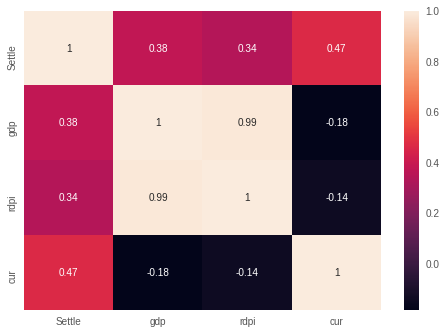

In [ ]:
a = merge3[['Settle', 'gdp', 'rdpi', 'cur']]
corrMatrix = a.corr()
print(corrMatrix)
print('\n')
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [ ]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5236 entries, 2000-01-04 to 2020-05-29
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5236 non-null   float64
 1   High    5236 non-null   float64
 2   Low     5236 non-null   float64
 3   Settle  5236 non-null   float64
 4   Volume  5236 non-null   float64
 5   gdp     5236 non-null   float64
 6   rdpi    5236 non-null   float64
 7   cur     5236 non-null   float64
dtypes: float64(8)
memory usage: 528.2 KB


In [17]:
# feature engineering
merge3['day_of_week'] = merge3.index.dayofweek
merge3['day_of_month'] = merge3.index.day
merge3['quarter'] = merge3.index.quarter
merge3['month'] = merge3.index.month
merge3['year'] = merge3.index.year
merge3.tail()

,Open,High,Low,Settle,Volume,gdp,rdpi,cur,day_of_week,day_of_month,quarter,month,year
Date,,,,,,,,,,,,,
2020-07-06,42.79,43.71,42.74,43.10,183962.0,805.390476,756.257619,0.561174,0,6,3,7,2020
2020-07-07,43.13,43.45,42.46,43.08,181432.0,805.390476,756.257619,0.561174,1,7,3,7,2020
2020-07-08,42.81,43.47,42.75,43.29,183778.0,805.390476,756.257619,0.561174,2,8,3,7,2020
2020-07-09,43.30,43.50,41.94,42.35,235104.0,805.390476,756.257619,0.561174,3,9,3,7,2020
2020-07-10,42.36,43.42,41.32,43.24,211424.0,805.390476,756.257619,0.561174,4,10,3,7,2020


In [18]:
# add the outcome variable, 1 if the trading session was positive (settle>open), 0 otherwise
#oil['outcome'] = np.where(oil['Open'] > oil['Settle'].shift(1), 1, 0)
# we also add three new columns ‘ho’ ‘lo’ and ‘gain’
merge3['h_o'] = merge3['High'] - merge3['Open'] # distance between Highest and Opening price
merge3['l_o'] = merge3['Low'] - merge3['Open'] # distance between Lowest and Opening price
merge3['gain'] = merge3['Settle'] - merge3['Open']


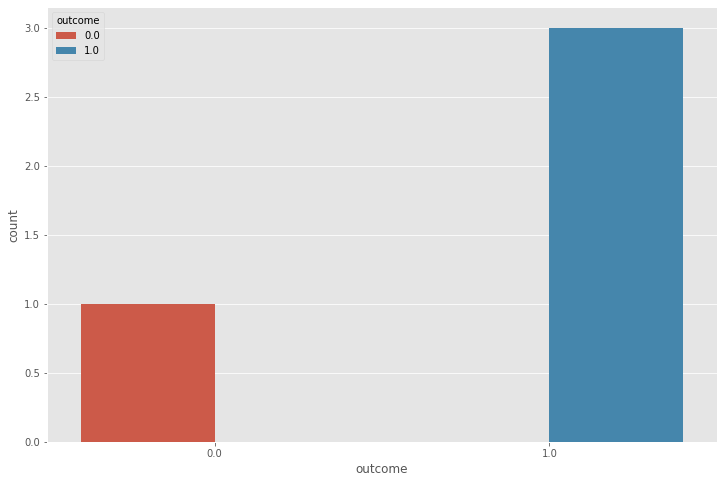

In [ ]:
import seaborn as sns
sns.countplot(x = 'outcome', data=oil, hue='outcome')
plt.show()

In [19]:
merge3['100ma'] = merge3['Settle'].rolling(window=100, min_periods=0).mean()
merge3['Daily_Return'] = merge3['Settle'].pct_change()
merge3['10ma'] = merge3['Settle'].rolling(window = 10).mean()
merge3['50ma'] = merge3['Settle'].rolling(window = 50).mean()
merge3

,Open,High,Low,Settle,Volume,gdp,rdpi,cur,day_of_week,day_of_month,quarter,month,year,h_o,l_o,gain,100ma,Daily_Return,10ma,50ma
Date,,,,,,,,,,,,,,,,,,,,
2000-01-04,23.90,24.70,23.89,24.39,32509.0,615.437095,443.195238,0.190476,1,4,1,1,2000,0.80,-0.01,0.49,24.390000,NaN,NaN,NaN
2000-01-05,24.25,24.37,23.70,23.73,30310.0,615.437095,443.195238,0.190476,2,5,1,1,2000,0.12,-0.55,-0.52,24.060000,-0.027060,NaN,NaN
2000-01-06,23.55,24.22,23.35,23.62,44662.0,615.437095,443.195238,0.190476,3,6,1,1,2000,0.67,-0.20,0.07,23.913333,-0.004635,NaN,NaN
2000-01-07,23.57,23.98,23.05,23.09,34826.0,615.437095,443.195238,0.190476,4,7,1,1,2000,0.41,-0.52,-0.48,23.707500,-0.022439,NaN,NaN
2000-01-10,23.04,23.78,23.04,23.73,26388.0,615.437095,443.195238,0.190476,0,10,1,1,2000,0.74,0.00,0.69,23.712000,0.027718,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,42.79,43.71,42.74,43.10,183962.0,805.390476,756.257619,0.561174,0,6,3,7,2020,0.92,-0.05,0.31,36.162300,0.007009,41.894,36.4142
2020-07-07,43.13,43.45,42.46,43.08,181432.0,805.390476,756.257619,0.561174,1,7,3,7,2020,0.32,-0.67,-0.05,36.016400,-0.000464,41.939,36.8666
2020-07-08,42.81,43.47,42.75,43.29,183778.0,805.390476,756.257619,0.561174,2,8,3,7,2020,0.66,-0.06,0.48,35.871800,0.004875,42.237,37.2816


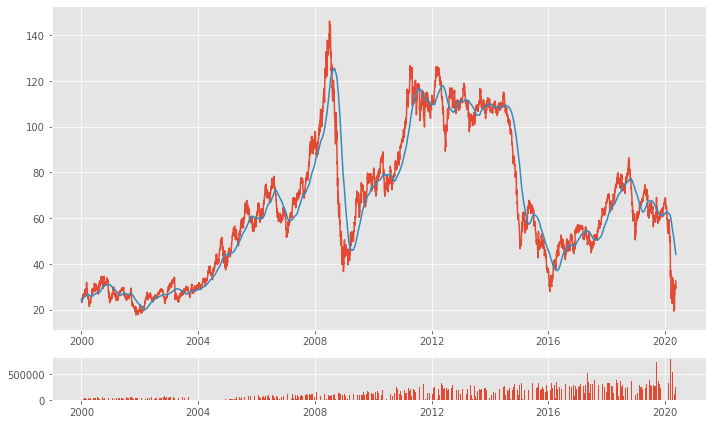

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan =5, colspan =1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan =1, colspan =1, sharex = ax1)
ax1.plot(oil.index, oil['Settle'])
ax1.plot(oil.index, oil['100ma'])
ax2.bar(oil.index, oil['Volume'])
plt.tight_layout()
plt.show()

- RSI = 100 - 100 / (1 + RS)
- where RS = Average gain over the last 14 days/Average loss over the last 14 days

In [20]:
rsi_period = 14 
chg = merge3['Settle'].diff(1)
gain = chg.mask(chg<0,0)
loss = chg.mask(chg>0,0)
avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
rs = abs(avg_gain/avg_loss)
merge3['rsi'] = 100-(100/(1+ rs))

In [21]:
merge3['Std_dev']=  merge3['Settle'].rolling(5).std()
merge3['ROC'] = ((merge3['Settle'] - merge3['Settle'].shift(5)) / (merge3['Settle'].shift(5)))*100
merge3['Williams%R'] = (merge3['High'].max() - merge3['Settle'])/(merge3['High'] - merge3['Low'].min()) * -100

### Ease of Movement (EVM)
Ease of Movement (EVM) is a volume-based oscillator which was developed by Richard Arms. EVM indicates the ease with which the prices rise or fall taking into account the volume of the security. For example, a price rise on a low volume means prices advanced with relative ease, and there was little selling pressure. Positive EVM values imply that the market is moving higher with ease, while negative values indicate an easy decline.

In [22]:
# Ease of Movement 
dm = ((merge3['High'] + merge3['Low'])/2) - ((merge3['High'].shift(1) + merge3['Low'].shift(1))/2)
br = (merge3['Volume'] / 100000000) / ((merge3['High'] - merge3['Low']))
merge3['EVM'] = dm / br 

In [ ]:
merge3.tail()

In [ ]:
merge3['Settle'].shift(-1)

Date
2000-01-04    23.73
2000-01-05    23.62
2000-01-06    23.09
2000-01-07    23.73
2000-01-10    24.62
              ...  
2020-05-25    36.17
2020-05-26    34.74
2020-05-27    35.29
2020-05-28    35.33
2020-05-29      NaN
Name: Settle, Length: 5236, dtype: float64

In [23]:
oil = merge3.copy()
oil['outcome'] = oil['Settle'].shift(-1) - oil['Open']
oil.dropna(inplace=True)

In [24]:
def getBinary(value):
    if value> 0:
        return 1
    else:
        return 0

oil['outcome'] = oil['outcome'].apply(getBinary)
oil['outcome']

Date
2000-03-13    0
2000-03-14    0
2000-03-15    0
2000-03-16    0
2000-03-17    0
             ..
2020-07-03    1
2020-07-06    1
2020-07-07    1
2020-07-08    0
2020-07-09    0
Name: outcome, Length: 5205, dtype: int64

In [25]:
oil['outcome'] = oil['outcome'].apply(getBinary)
oil['outcome']

Date
2000-03-13    0
2000-03-14    0
2000-03-15    0
2000-03-16    0
2000-03-17    0
             ..
2020-07-03    1
2020-07-06    1
2020-07-07    1
2020-07-08    0
2020-07-09    0
Name: outcome, Length: 5205, dtype: int64

In [26]:
oil[['Open', 'Settle', 'outcome']].tail(10)

,Open,Settle,outcome
Date,,,
2020-06-26,41.44,41.02,1
2020-06-29,40.56,41.71,1
2020-06-30,41.33,41.15,1
2020-07-01,41.58,42.03,1
2020-07-02,41.84,43.14,1
2020-07-03,42.76,42.80,1
2020-07-06,42.79,43.10,1
2020-07-07,43.13,43.08,1
2020-07-08,42.81,43.29,0


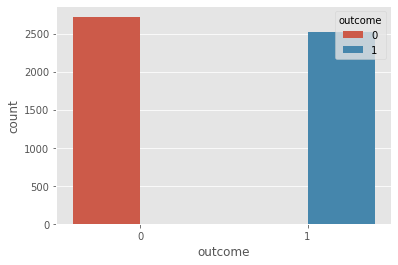

In [ ]:
import seaborn as sns
sns.countplot(x = 'outcome', data=merge3, hue='outcome')
plt.show()

In [ ]:
oil.columns

Index(['Open', 'High', 'Low', 'Settle', 'Volume', 'day_of_week', 'day_of_month', 'quarter', 'month', 'year', 'h_o', 'l_o', 'gain', '100ma',
       'Daily_Return', '10ma', '50ma', 'loss', 'avg_gain', 'avg_loss', 'rs', 'rsi', 'Std_dev', 'ROC', 'Williams%R', 'EVM', 'outcome'],
      dtype='object')

This is my function (based on this) to clean the dataset of nan, Inf, and missing cells (for skewed datasets)

In [27]:
def clean_dataset(oil):
    assert isinstance(oil), "df needs to be a pd.DataFrame"
    oil.fillna(-99999, inplace=True)
    indices_to_keep = ~oil.isin([np.nan, np.inf, -np.inf]).any(1)
    return oil[indices_to_keep].astype(np.float64)
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5205 entries, 2000-03-13 to 2020-07-09
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5205 non-null   float64
 1   High          5205 non-null   float64
 2   Low           5205 non-null   float64
 3   Settle        5205 non-null   float64
 4   Volume        5205 non-null   float64
 5   gdp           5205 non-null   float64
 6   rdpi          5205 non-null   float64
 7   cur           5205 non-null   float64
 8   day_of_week   5205 non-null   int64  
 9   day_of_month  5205 non-null   int64  
 10  quarter       5205 non-null   int64  
 11  month         5205 non-null   int64  
 12  year          5205 non-null   int64  
 13  h_o           5205 non-null   float64
 14  l_o           5205 non-null   float64
 15  gain          5205 non-null   float64
 16  100ma         5205 non-null   float64
 17  Daily_Return  5205 non-null   float64
 18  10ma      

In [28]:
BC= BC.astype(float)
BC.dtypes

Open      float64
High      float64
Low       float64
Settle    float64
Volume    float64
dtype: object

### Interquartile Range :
The interquartile range (IQR), also called as midspread or middle 50%, or technically H-spread is the difference between the third quartile (Q3) and the first quartile (Q1). It covers the center of the distribution and contains 50% of the observations. 
- IQR = Q3 – Q1
- The IQR can also be used to identify the outliers in the given data set.
- The IQR gives the central tendency of the data.

In [ ]:
Q1 = BC.quantile(0.25)
Q3 = BC.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Open                43.992500
High                44.377500
Low                 43.532500
Settle              44.000000
Volume          171748.000000
day_of_week          2.000000
day_of_month        15.000000
quarter              2.000000
month                6.000000
year                10.000000
outcome              1.000000
h_o                  0.910000
l_o                  0.960000
gain                 1.240000
100ma               40.719775
Daily_Return         0.022350
10ma                43.409750
50ma                40.702550
Std_dev              0.773729
ROC                  5.452952
rsi                 24.095054
Williams%R         333.300727
EVM               1661.525826
dtype: float64


In [ ]:
BC.shape

(5218, 23)

In [ ]:
BC_out = BC[~((BC < (Q1 - 1.5 * IQR)) |(BC > (Q3 + 1.5 * IQR))).any(axis=1)]
BC_out.shape

(3248, 23)

In [ ]:
X = merge3.drop(['outcome',
             'Open',
             'High',
             'Low',
             'Settle',
             'Volume'], axis=1) # Features

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from joblib import Parallel, delayed
import time

k = X.copy()
k = k.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

def calculate_vif_(k, thresh=10.0):
    variables = [k.columns[i] for i in range(k.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(
            delayed(variance_inflation_factor)(
                k[variables].values, ix) 
            for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + k[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return k[[i for i in variables]]

z = calculate_vif_(k,10) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Sat May 30 11:46:46 2020 dropping 'gdp' at index: 0
19
Sat May 30 11:46:47 2020 dropping '50ma' at index: 13
18


[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Sat May 30 11:46:47 2020 dropping 'year' at index: 6
17
Sat May 30 11:46:47 2020 dropping '100ma' at index: 9
16


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Sat May 30 11:46:47 2020 dropping 'quarter' at index: 4
15
Sat May 30 11:46:47 2020 dropping 'rdpi' at index: 0
14


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Sat May 30 11:46:47 2020 dropping 'cur' at index: 0
13
Sat May 30 11:46:47 2020 dropping 'rsi' at index: 8
12
Remaining variables:
[['day_of_week', 'day_of_month', 'month', 'h_o', 'l_o', 'gain', 'Daily_Return', '10ma', 'Std_dev', 'ROC', 'Williams%R', 'EVM']]


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


In [ ]:
oil.columns

Index(['Open', 'High', 'Low', 'Settle', 'Volume', 'gdp', 'rdpi', 'cur', 'day_of_week', 'day_of_month', 'quarter', 'month', 'year', 'h_o', 'l_o',
       'gain', '100ma', 'Daily_Return', '10ma', '50ma', 'rsi', 'Std_dev', 'ROC', 'Williams%R', 'EVM', 'outcome'],
      dtype='object')

In [29]:
X = oil[['day_of_week', 'day_of_month', 'month', 'h_o', 'l_o', 'gain', 
         'Daily_Return', '10ma', 'Std_dev', 'ROC', 'Williams%R',]]
print(X.columns)
y = oil['outcome'].copy()

Index(['day_of_week', 'day_of_month', 'month', 'h_o', 'l_o', 'gain', 'Daily_Return', '10ma', 'Std_dev', 'ROC', 'Williams%R'], dtype='object')


In [30]:
X.reset_index(inplace=True)
y = pd.DataFrame(y)
y.rename(columns = {0: 'outcome'}, inplace=True)
y.reset_index(inplace=True)

<IPython.core.display.Javascript object>

In [31]:
Xtrain = X.loc[X.Date <= '2018']
ytrain = y.loc[y.Date <= '2018']
Xtest = X.loc[X.Date > '2018']
ytest = y.loc[y.Date > '2018']

In [32]:
Xtrain.set_index('Date', inplace=True)
ytrain.set_index('Date', inplace=True)
Xtest.set_index('Date', inplace=True)
ytest.set_index('Date', inplace=True)

In [30]:
ytest

,outcome
Date,
2018-01-02,1
2018-01-03,1
2018-01-04,0
2018-01-05,0
2018-01-08,1
...,...
2020-07-03,1
2020-07-06,1
2020-07-07,1


In [33]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_scale = scaler.fit_transform(Xtrain)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(4554, 11) (651, 11) (4554, 1) (651, 1)


In [ ]:
np.isnan(X_train_scale).any()

<IPython.core.display.Javascript object>

False

In [ ]:
np.argwhere(np.isnan(X_train_scale))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([], shape=(0, 2), dtype=int64)

In [ ]:
X_train_scale = np.nan_to_num(X_train_scale)
np.isnan(X_train_scale).any()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

False

In [34]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

xgb = XGBClassifier()
logreg2= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dtclf = DecisionTreeClassifier(max_depth=5)
rfclf = RandomForestClassifier()

# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, Xtrain_scale, np.ravel(ytrain), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    accuracy = "%s: %.2f%% (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print('Accuracy:')
    print(accuracy)    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy:
LR: 0.74% (0.02)


<IPython.core.display.Javascript object>

Accuracy:
XGB: 0.74% (0.03)


<IPython.core.display.Javascript object>

Accuracy:
KNN: 0.66% (0.03)


<IPython.core.display.Javascript object>

Accuracy:
DT: 0.66% (0.02)


<IPython.core.display.Javascript object>

Accuracy:
ADB: 0.74% (0.02)


<IPython.core.display.Javascript object>

Accuracy:
RF: 0.73% (0.02)


<IPython.core.display.Javascript object>

Accuracy:
SVC: 0.74% (0.03)


In [35]:
eval_set = [(Xtrain, np.ravel(ytrain)), (Xtest, np.ravel(ytest))]

# Hyperparameter optimization
xgb = XGBClassifier()

clf = xgb.fit(Xtrain, np.ravel(ytrain), 
              early_stopping_rounds=10,  
              eval_metric="logloss", 
              eval_set=eval_set)

# scores
from  sklearn.metrics import log_loss
log_train = log_loss(np.ravel(ytrain), clf.predict_proba(Xtrain)[:,1])
log_valid = log_loss(np.ravel(ytest), clf.predict_proba(Xtest)[:,1])


print('\n-----------------------')
print('  logloss train: %.5f'%log_train)
print('  logloss valid: %.5f'%log_valid)
print('-----------------------')

print('\nModel parameters...')
print(xgb.get_params())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0]	validation_0-logloss:0.663865	validation_1-logloss:0.664423
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.639942	validation_1-logloss:0.640998
[2]	validation_0-logloss:0.620152	validation_1-logloss:0.621628
[3]	validation_0-logloss:0.6036	validation_1-logloss:0.605384
[4]	validation_0-logloss:0.589773	validation_1-logloss:0.591449
[5]	validation_0-logloss:0.578177	validation_1-logloss:0.580316
[6]	validation_0-logloss:0.568251	validation_1-logloss:0.570565
[7]	validation_0-logloss:0.559916	validation_1-logloss:0.562835
[8]	validation_0-logloss:0.552584	validation_1-logloss:0.5559
[9]	validation_0-logloss:0.546336	validation_1-logloss:0.550202
[10]	validation_0-logloss:0.540985	validation_1-logloss:0.545627
[11]	validation_0-logloss:0.536429	validation_1-logloss:0.541669
[12]	validation_0-logloss:0.532425	validation_1-logloss:0.537882
[13]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


-----------------------
  logloss train: 0.50259
  logloss valid: 0.52060
-----------------------

Model parameters...
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


ref: https://xgboost.readthedocs.io/en/latest/parameter.html

- eta [default=0.3, alias: learning_rate]

Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.

- range: [0,1]

- gamma [default=0, alias: min_split_loss]

Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

- range: [0,∞]

- max_depth [default=6]

Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 is only accepted in lossguided growing policy when tree_method is set as hist and it indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree.

- range: [0,∞] (0 is only accepted in lossguided growing policy when tree_method is set as hist)

- min_child_weight [default=1]

Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.

- range: [0,∞]

- max_delta_step [default=0]

Maximum delta step we allow each leaf output to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update.

- range: [0,∞]

- subsample [default=1]

Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

- range: (0,1]

- sampling_method [default= uniform]

The method to use to sample the training instances.

- uniform: each training instance has an equal probability of being selected. Typically set subsample >= 0.5 for good results.

- gradient_based: the selection probability for each training instance is proportional to the regularized absolute value of gradients (more specifically, g2+λh2−−−−−−−√). subsample may be set to as low as 0.1 without loss of model accuracy. Note that this sampling method is only supported when tree_method is set to gpu_hist; other tree methods only support uniform sampling.

- colsample_bytree, colsample_bylevel, colsample_bynode [default=1]

This is a family of parameters for subsampling of columns.

      - All colsample_by* parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.

      - colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

      - colsample_bylevel is the subsample ratio of columns for each level. Subsampling occurs once for every new depth level reached in a tree. Columns are subsampled from the set of columns chosen for the current tree.

      - colsample_bynode is the subsample ratio of columns for each node (split). Subsampling occurs once every time a new split is evaluated. Columns are subsampled from the set of columns chosen for the current level.

      - colsample_by* parameters work cumulatively. For instance, the combination {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} with 64 features will leave 8 features to choose from at each split.

- lambda [default=1, alias: reg_lambda]

L2 regularization term on weights. Increasing this value will make model more conservative.

- alpha [default=0, alias: reg_alpha]

L1 regularization term on weights. Increasing this value will make model more conservative.

- tree_method string [default= auto]

The tree construction algorithm used in XGBoost. 

- scale_pos_weight [default=1]

Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances). See Parameters Tuning for more discussion. Also, see Higgs Kaggle competition demo for examples: R, py1, py2, py3.

- updater [default= grow_colmaker,prune]

A comma separated string defining the sequence of tree updaters to run, providing a modular way to construct and to modify the trees. This is an advanced parameter that is usually set automatically, depending on some other parameters. However, it could be also set explicitly by a user. The following updaters exist:

    - grow_colmaker: non-distributed column-based construction of trees.

    - grow_histmaker: distributed tree construction with row-based data splitting based on global proposal of histogram counting.

    - grow_local_histmaker: based on local histogram counting.
    - grow_skmaker: uses the approximate sketching algorithm
    - grow_quantile_histmaker: Grow tree using quantized histogram
    - grow_gpu_hist: Grow tree with GPU.
    - sync: synchronizes trees in all distributed nodes.
    - refresh: refreshes tree’s statistics and/or leaf values based on the current data. Note that no random subsampling of data rows is performed.
    - prune: prunes the splits where loss < min_split_loss (or gamma).

In a distributed setting, the implicit updater sequence value would be adjusted to grow_histmaker,prune by default, and you can set tree_method as hist to use grow_histmaker.

- refresh_leaf [default=1]

This is a parameter of the refresh updater. When this flag is 1, tree leafs as well as tree nodes’ stats are updated. When it is 0, only node stats are updated.

- process_type [default= default]

A type of boosting process to run.

    - Choices: default, update
    - default: The normal boosting process which creates new trees.
    - update: Starts from an existing model and only updates its trees. In each boosting iteration, a tree from the initial model is taken, a specified sequence of updaters is run for that tree, and a modified tree is added to the new model. The new model would have either the same or smaller number of trees, depending on the number of boosting iteratons performed. Currently, the following built-in updaters could be meaningfully used with this process type: refresh, prune. With process_type=update, one cannot use updaters that create new trees.

- grow_policy [default= depthwise]

Controls a way new nodes are added to the tree.

Currently supported only if tree_method is set to hist.

    - Choices: depthwise, lossguide
    - depthwise: split at nodes closest to the root.
    - lossguide: split at nodes with highest loss change.
    - max_leaves [default=0]
    - Maximum number of nodes to be added. Only relevant when grow_policy=lossguide is set.
    - max_bin, [default=256]

Only used if tree_method is set to hist.

Maximum number of discrete bins to bucket continuous features.

Increasing this number improves the optimality of splits at the cost of higher computation time.

- predictor, [default=``auto``]

The type of predictor algorithm to use. Provides the same results but allows the use of GPU or CPU.

     - auto: Configure predictor based on heuristics.
     - cpu_predictor: Multicore CPU prediction algorithm.
     - gpu_predictor: Prediction using GPU. Used when tree_method is gpu_hist. When predictor is set to default value auto, the gpu_hist tree method is able to provide GPU based prediction without copying training data to GPU memory. If gpu_predictor is explicitly specified, then all data is copied into GPU, only recommended for performing prediction tasks.

- num_parallel_tree, [default=1] - Number of parallel trees constructed during each iteration. This option is used to support boosted random forest.

monotone_constraints

Constraint of variable monotonicity. See tutorial for more information.

interaction_constraints

Constraints for interaction representing permitted interactions. The constraints must be specified in the form of a nest list, e.g. [[0, 1], [2, 3, 4]], where each inner list is a group of indices of features that are allowed to interact with each other. See tutorial for more information



In [51]:
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
eval_set = [(Xtrain, np.ravel(ytrain)), (Xtest, np.ravel(ytest))]
model.fit(Xtrain, np.ravel(ytrain), eval_metric=["error", "logloss"], 
          early_stopping_rounds=10,eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(np.ravel(ytest), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0]	validation_0-error:0.251208	validation_0-logloss:0.663865	validation_1-error:0.25192	validation_1-logloss:0.664423
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.251208	validation_0-logloss:0.639942	validation_1-error:0.25192	validation_1-logloss:0.640998
[2]	validation_0-error:0.251427	validation_0-logloss:0.620152	validation_1-error:0.247312	validation_1-logloss:0.621628
[3]	validation_0-error:0.248792	validation_0-logloss:0.6036	validation_1-error:0.250384	validation_1-logloss:0.605384
[4]	validation_0-error:0.248792	validation_0-logloss:0.589773	validation_1-error:0.250384	validation_1-logloss:0.591449
[5]	validation_0-error:0.248792	validation_0-logloss:0.578177	validation_1-error:0.250384	validation_1-logloss:0.580316
[6]	validation_0-error:0.248792	validation_0-logloss:0.568251	validation_1-error:0.250384	validation_1-logloss:0.570565

<IPython.core.display.Javascript object>

Accuracy: 74.04%


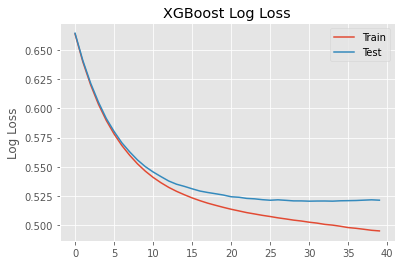

In [55]:
%matplotlib inline

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


From reviewing the logloss plot, it looks like there is an opportunity to stop the learning early, perhaps somewhere around epoch 20 to epoch 40.

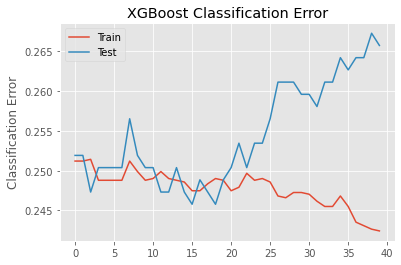

In [53]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [56]:
from pprint import pprint
# Check parameters used 
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.1, 0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [3, 5, 6],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 200, 300, 500]}

clf_grid = GridSearchCV(model,
                   parameters,
                   cv = 10,
                   n_jobs = 5,
                   verbose=True)

clf_grid.fit(Xtrain,np.ravel(ytrain))

print(clf_grid.best_score_)
print(clf_grid.best_params_)

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  7.2min
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:  8.1min finished


0.7404424522845575
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.7}


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3,
              learning_rate= 0.03,
              min_child_weight= 4, 
              n_estimators= 100,
              nthread= 4, 
              subsample=0.7,
              colsample_bytree=0.7, 
              objective= 'binary:logistic')
kfold = model_selection.KFold(n_splits=10, shuffle=False)
results = cross_val_score(clf, Xtrain, np.ravel(ytrain), cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

probabilities = clf.fit(Xtrain, np.ravel(ytrain),
                        eval_metric = 'auc').predict_proba(Xtest)
print('AUPRC = {}'.format(round(average_precision_score(np.ravel(ytest), \
                                              probabilities[:, 1])*100, 2).astype(str) + '%'))

<IPython.core.display.Javascript object>

Accuracy: 74.40% (1.54%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUPRC = 83.18%


Use area under ROC as a base metric for deciding best tuned model 

This metric is a measure of how well sorted your classes are - the higher the value, the easier and more effective it is to tune the confidence level later.

In [59]:
pip install scikit-plot

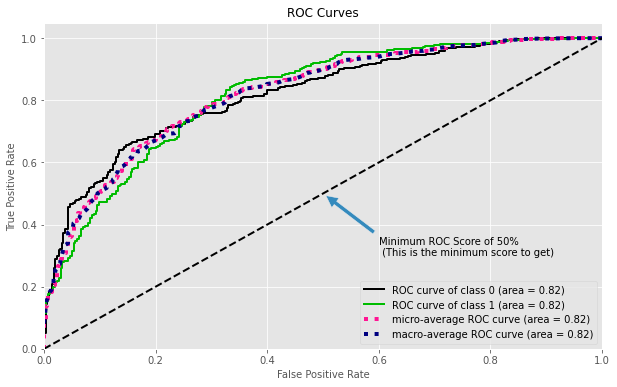

In [60]:
import scikitplot as skplt #to make things easy
y_pred = clf.predict_proba(Xtest)
plt.rcParams['figure.figsize'] = [10, 6]
skplt.metrics.plot_roc(ytest, y_pred)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', 
             xy=(0.5, 0.5), 
             xytext=(0.6, 0.3),
             arrowprops=dict(shrink=0.05),
                )
plt.show()

In [61]:
from sklearn.metrics import explained_variance_score
predictions = clf.predict(Xtest)
predictions
#print((round(explained_variance_score(predictions,y_test),2)*100).astype(str) + '%')

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [ ]:
predictions.shape

(1307,)

Our trading strategy waits for a positively predicted outcome to buy S&P 500 at the Opening price, and sell it at the Closing price, so our hope is to have the lowest False positives rate to avoid losses. In other words, we expect our model would have the highest precision rate.

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar() )

In [ ]:
ytest

,outcome
Date,
2018-01-02,0.0
2018-01-03,0.0
2018-01-04,0.0
2018-01-05,0.0
2018-01-08,1.0
...,...
2020-05-18,0.0
2020-05-19,1.0
2020-05-20,1.0


In [80]:
predictions = pd.DataFrame(predictions[-5:])
predictions.rename(columns = {0: 'predicted'}, inplace=True)
d = ytest.tail()
d.reset_index(inplace=True)
d = d.append(pd.DataFrame({'Date': pd.date_range(start=d.Date.iloc[-1], 
                                             periods=2, freq='B', closed='right')}))
d.set_index('Date', inplace=True)
predictions.index = d.tail().index
predictions.tail(1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,predicted
Date,
2020-07-10,0


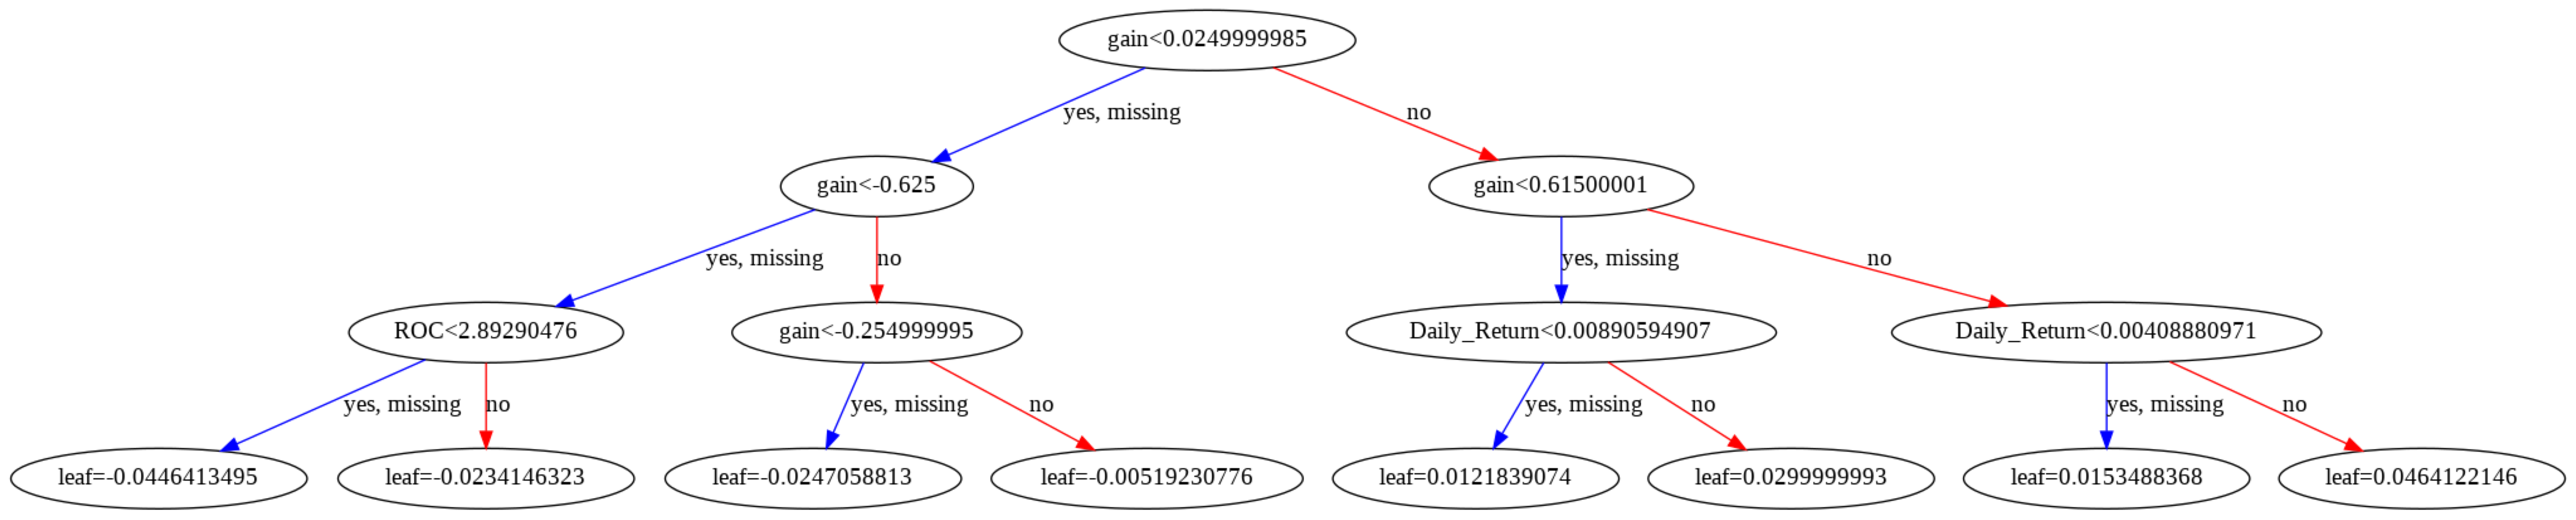

In [62]:
import graphviz
import xgboost as xgb
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(clf)
plt.show()

In [63]:
pip install shap

     |████████████████████████████████| 276kB 12.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394116 sha256=cbbfd3d9cd4e5553a1eabd1a6c59f1abbbf3a29d2701db3168c91c255ea7153e
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


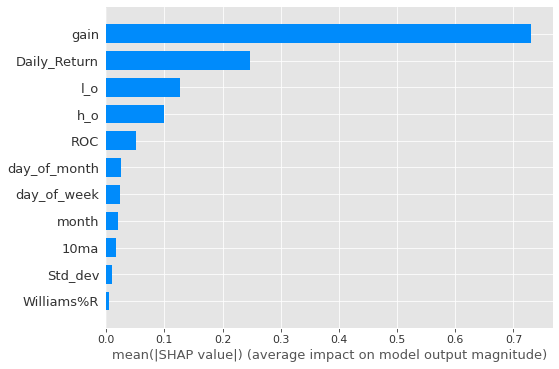

In [64]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, plot_type="bar")

In [65]:
!pip install eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 9.3MB/s 


The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
Using TensorFlow backend.


In [66]:
import eli5
# let's check the importance of each attributes
perm = PermutationImportance(clf, random_state = 0).fit(Xtest, ytest)
eli5.show_weights(perm, feature_names = Xtest.columns.tolist())

Weight,Feature
0.1453 ± 0.0232,gain
0.0012 ± 0.0041,month
0.0003 ± 0.0090,l_o
0 ± 0.0000,Williams%R
0.0000 ± 0.0027,ROC
-0.0003 ± 0.0023,Std_dev
-0.0006 ± 0.0050,day_of_week
-0.0018 ± 0.0041,10ma
-0.0025 ± 0.0172,Daily_Return
-0.0052 ± 0.0092,h_o


In [67]:
perm_train = PermutationImportance(clf, scoring='accuracy',
                                   n_iter=100, random_state=1)
# fit and see the permuation importances
perm_train.fit(Xtrain, ytrain)
eli5.explain_weights_df(perm_train, feature_names=Xtrain.columns.tolist()).head()

,feature,weight,std
0,gain,0.147284,0.006100
1,l_o,0.003900,0.002108
2,Daily_Return,0.002459,0.002588
3,10ma,0.000123,0.000946
4,day_of_week,-0.000086,0.000906


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

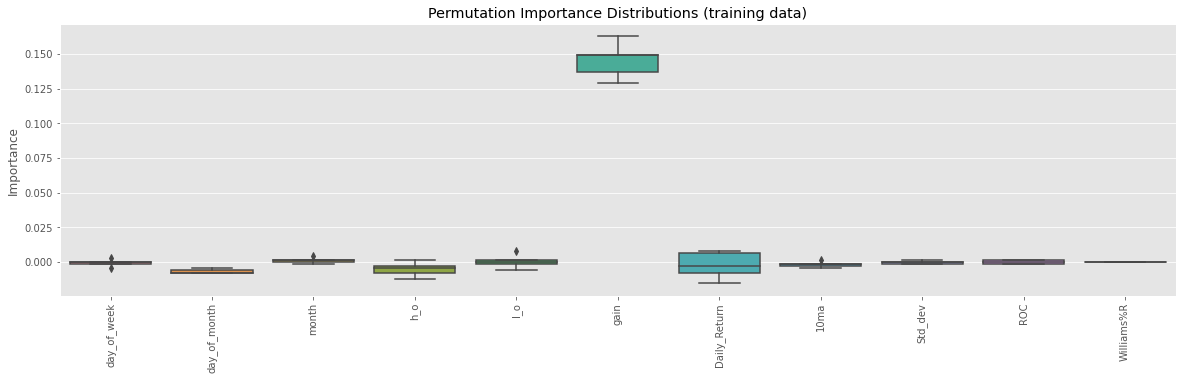

In [71]:
# figure size in inches
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,5

perm_train_df = pd.DataFrame(data=perm.results_,
                                      columns=Xtrain.columns)
(sns.boxplot(data=perm_train_df)
        .set(title='Permutation Importance Distributions (training data)',
             ylabel='Importance'));
plt.xticks(rotation=90)
plt.show()

In [72]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
# j will be the record we explain
j = 1

explainerXGB = shap.TreeExplainer(clf)
shap_values_XGB_test = explainerXGB.shap_values(Xtest)
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], Xtest.iloc[[j]])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


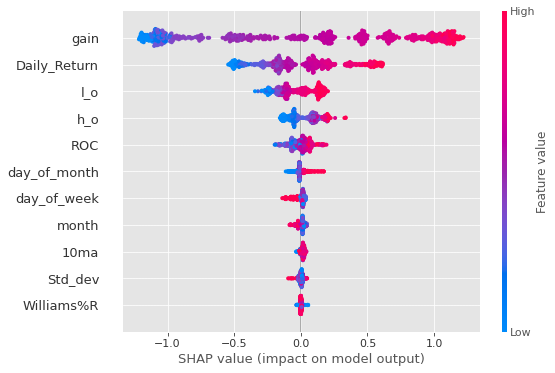

In [73]:
shap.summary_plot(shap_values, Xtest)

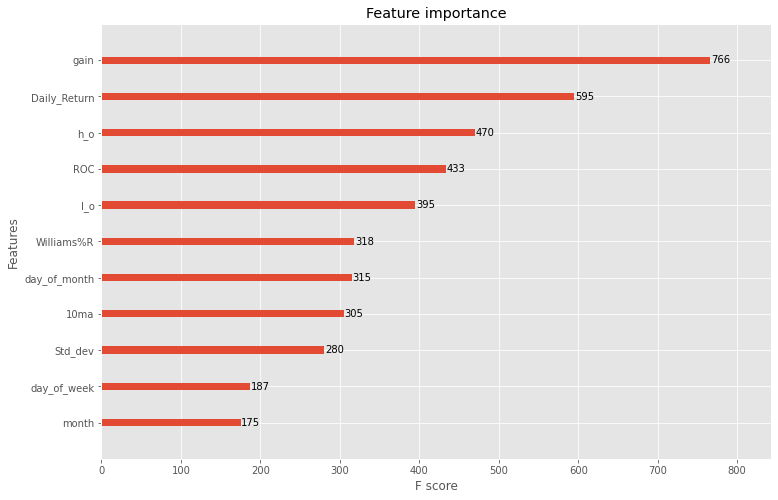

In [ ]:
from xgboost import plot_importance
plt.rcParams['figure.figsize'] = [12, 8]
# plot feature importance
plot_importance(clf)
plt.show()

Measuring feature importance by:
- Weight. The number of times a feature is used to split the data across all trees.
- Cover. The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits.
- Gain. The average training loss reduction gained when using a feature for splitting.

In [ ]:
clf.get_booster().get_score(importance_type='weight') 

{'10ma': 305,
 'Daily_Return': 595,
 'ROC': 433,
 'Std_dev': 280,
 'Williams%R': 318,
 'day_of_month': 315,
 'day_of_week': 187,
 'gain': 766,
 'h_o': 470,
 'l_o': 395,
 'month': 175}

In [ ]:
clf.get_booster().get_score(importance_type='cover') 

{'10ma': 135.40464695747542,
 'Daily_Return': 280.8084264600675,
 'ROC': 136.19340896709005,
 'Std_dev': 123.30946466310716,
 'Williams%R': 143.1935555004403,
 'day_of_month': 139.60725678603177,
 'day_of_week': 171.95119383245998,
 'gain': 423.152767835901,
 'h_o': 164.33307846199992,
 'l_o': 184.06694254815184,
 'month': 117.40078976879998}

In [ ]:
clf.get_booster().get_score(importance_type='gain')

{'10ma': 5.722006662691801,
 'Daily_Return': 26.365844750700838,
 'ROC': 5.397824946718242,
 'Std_dev': 5.570943066221424,
 'Williams%R': 5.663140247971697,
 'day_of_month': 4.863664652180954,
 'day_of_week': 5.555479533160429,
 'gain': 61.03852295094383,
 'h_o': 7.8479376137957395,
 'l_o': 10.192735011787336,
 'month': 4.91737582298286}

In [74]:
import sklearn.metrics as metrics

In [75]:
from sklearn.metrics import cohen_kappa_score, recall_score, roc_auc_score

# make predictions for train data and evaluate
ypred = clf.predict(Xtrain)
auc = round(roc_auc_score(ytrain, clf.predict(Xtrain))*100,2).astype(str) + '%'
print("Performance (train data) : ", auc)

# make predictions for test data and evaluate
auc = round(roc_auc_score(ytest, clf.predict(Xtest))*100,2).astype(str) + '%'
print("Performance (test data) : ", auc)
print('*'*60)

print ("\nModel Report (test data):-")
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(ytest, clf.predict(Xtest))*100,2).astype(str) + '%'))
print('Recall: ', round(recall_score(ytest, clf.predict(Xtest))*100, 2).astype(str) + '%')
print('*'*60)
print('\n Classification Report (test data):-\n', classification_report(ytest, clf.predict(Xtest)))

Performance (train data) :  75.33%
Performance (test data) :  73.86%
************************************************************

Model Report (test data):-


<IPython.core.display.Javascript object>

Cohen Kappa: 47.77%
Recall:  76.44%
************************************************************

 Classification Report (test data):-
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       303
           1       0.75      0.76      0.76       348

    accuracy                           0.74       651
   macro avg       0.74      0.74      0.74       651
weighted avg       0.74      0.74      0.74       651



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

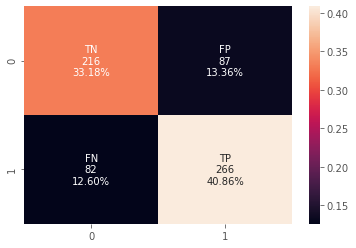

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

results = confusion_matrix(ytest, clf.predict(Xtest)) 
names = ['TN','FP','FN','TP']
counts = ['{0:0.0f}'.format(value) for value in
                results.flatten()]
percentages = ['{0:.2%}'.format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2,2)


plt.figure(figsize=(6,4))
sns.heatmap(results/np.sum(results), 
            annot=labels, 
            fmt='')
plt.show()

 - False positives are cases where the model predicts a positive outcome whereas the real outcome from the testing set is negative. 
 - Vice versa, False negatives are cases where the model predicts a negative outcome where the real outcome from the test set is positive.
 - Our trading strategy waits for a positively predicted outcome to buy crude oil at the Opening price, and sell it at the Closing price, so our hope is to have the lowest False positives rate to avoid losses. 
 - In other words, we expect our model would have the highest precision rate.

Learning curves constitute a great tool to do a quick check on our models at every point in our machine learning workflow. 

When we build a model to map the relationship between the features  and the target , we assume that there is such a relationship in the first place.

The gap between the learning curves suggests some amount of variance in data. The low training AUPRC score corroborate this diagnosis of variance. The large gap and the low training error also indicates slightly overfitting problem. One more important observation we can make here is that adding new training instances is very likely to lead to better models. The validation curve doesn’t plateau at the maximum training set size used. It still has potential to decrease and converge toward the training curve. So far, we can conclude that our learning algorithm (XGB) suffers from slight variance and quite a low bias, there slightly overfitting the training data. Adding more training instances is very likely to lead to better models under the current learning algorithm.

At this point, here are a couple of things we could do to improve our model:
Adding more training instances.
Increase the regularization for our current learning algorithm. This should decrease the variance and increase the bias.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

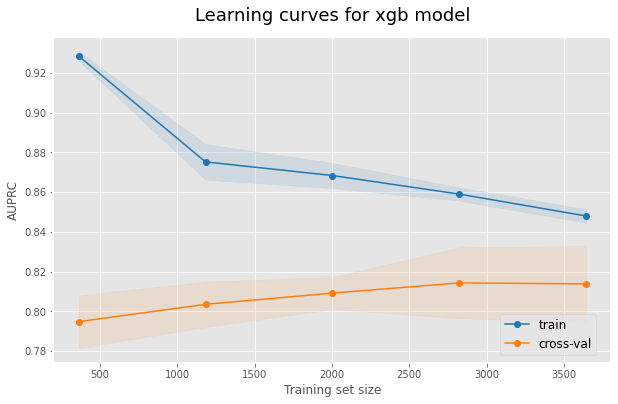

In [78]:
from sklearn.model_selection import learning_curve

train_size, train_score, cv_score = learning_curve(\
XGBClassifier(max_depth = 3,
              learning_rate= 0.03,
              min_child_weight= 4, 
              n_estimators= 100,
              nthread= 4, 
              subsample=0.7,
              colsample_bytree=0.7, 
              objective= 'binary:logistic'), 
              Xtrain,\
              np.ravel(ytrain), 
              scoring = 'average_precision')

mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
mean_cv = np.mean(cv_score, axis=1)
std_cv = np.std(cv_score, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (10, 6))
plt.style.use('ggplot')
plt.fill_between(train_size, 
                 (mean_train_score - std_train_score),
                 (mean_train_score + std_train_score), 
                 alpha=0.1, 
                 color=colours[0])
plt.fill_between(train_size, 
                 (mean_cv - std_cv),
                 (mean_cv + std_cv), 
                 alpha=0.1, 
                 color=colours[1])
plt.plot(train_size, 
         train_score.mean(axis = 1), 
         'o-', 
         label = 'train', \
         color = colours[0])
plt.plot(train_size, 
         cv_score.mean(axis = 1), 
         'o-', 
         label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], 
           bbox_to_anchor=(0.8, 0.15), \
           loc=2, 
           borderaxespad=0, 
           fontsize = 12)
plt.xlabel('Training set size', size = 12) 
plt.ylabel('AUPRC', size = 12)
plt.title('Learning curves for xgb model', fontsize = 18, y = 1.03)
plt.show()

A narrow gap indicates low variance. Generally, the more narrow the gap, the lower the variance. The opposite is also true: the wider the gap, the greater the variance. Let’s now explain why this is the case. As we’ve discussed earlier, if the variance is high, then the model fits training data too well. When training data is fitted too well, the model will have trouble generalizing on data that hasn’t seen in training. When such a model is tested on its training set, and then on a validation set, the training error will be low and the validation error will generally be high. As we change training set sizes, this pattern continues, and the differences between training and validation errors will determine that gap between the two learning curves.

The relationship between the training and validation error, and the gap can be summarized this way:  So the bigger the difference between the two errors, the bigger the gap. The bigger the gap, the bigger the variance. In our case, the gap is moderately narrow and getting narrower, so we can conclude that the variance is low. High training errors are also a quick way to detect low variance. If the variance of a learning algorithm is low, then the algorithm will come up with simplistic and similar models as we change the training sets. Because the models are overly simplified, they cannot even fit the training data well (they underfit the data).

- Adding more instances (rows) to the training data is hugely unlikely to lead to better models under the current learning algorithm.
- Increasing the regularization of the current learning algorithm, if that’s the case. In a nutshell, regularization prevents the algorithm from fitting the training data too well. If we increase regularization, the model will fit training data better, and, as a consequence, the variance will decrease and the bias will increase which will eventually reduce the gap to narrow it down.
- Adding more features.
- Feature selection.
- Hyperparameter optimization.

In [81]:
pred_prob = clf.predict_proba(Xtest[:5])
print('\033[4mProbability of prediction results\033[0m')
pred_prob = pd.DataFrame(pred_prob)
pred_prob.index = predictions.index
round(pred_prob.tail(),2)

Probability of prediction results


<IPython.core.display.Javascript object>

,0,1
Date,,
2020-07-06,0.49,0.51
2020-07-07,0.14,0.86
2020-07-08,0.36,0.64
2020-07-09,0.72,0.28
2020-07-10,0.43,0.57


Here, Sharpe is the 10 days Sharpe ratio, an important indicator of the goodness of the trading model. Considering trades expressed day by day. Here mean is the mean of the list of profit and loss, and std is the standard deviation. I have considered a risk-free return equal to 0.

the gain column contains (Close - Open) values I have written a simple helper function to plot the result of all the trades applied to the testing set and represent the total return expressed by the index basis points (not expressed in dollars $)

In [82]:
combine['gain'] = BC['Settle'] - BC['Open']
profit_loss = combine[combine['predicted'] == 1]['gain'] 
plt.plot(profit_loss)
plt.show
print('Sharpe ratio:', round(np.sqrt(10)*(profit_loss.mean()/profit_loss.std()),2))

NameError: ignored

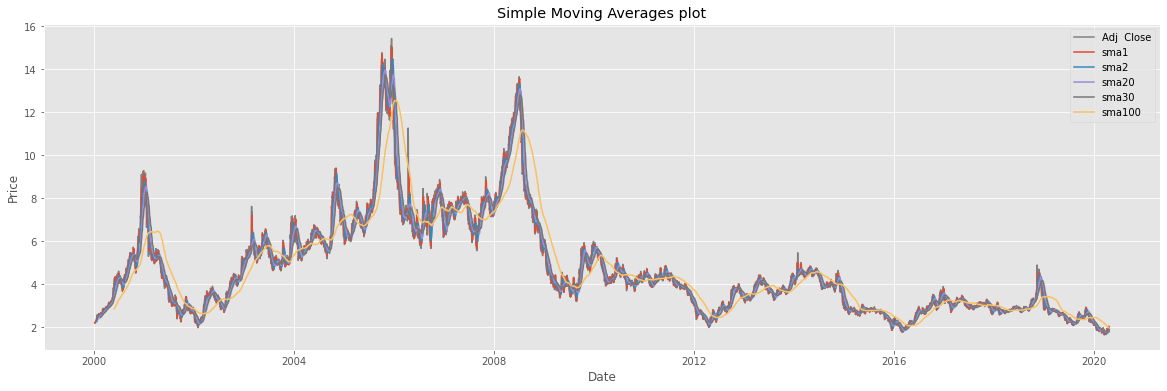

In [ ]:
# Plot 
fig = plt.figure(figsize=(20,6))
plt.plot(NG['Settle'], color='gray', label='Adj  Close')
plt.plot(NG['sma1'].dropna(), label = 'sma1')
plt.plot(NG['sma2'].dropna(), label = 'sma2')
plt.plot(NG['sma3'].dropna(), label = 'sma20')
plt.plot(NG['sma4'].dropna(), label = 'sma30')
plt.plot(NG['sma5'].dropna(), label = 'sma100')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Simple Moving Averages plot')
plt.legend(loc=0)

# Display everything
plt.show()

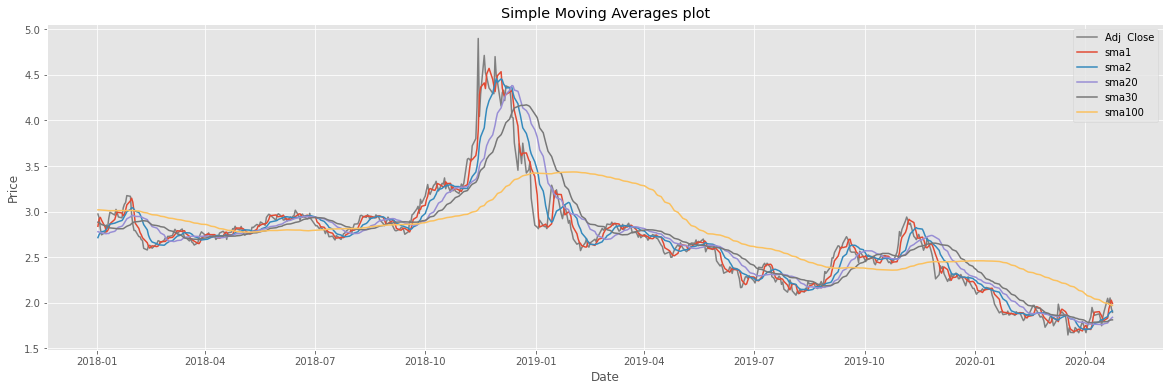

In [ ]:
NG = NG[NG.index > '2018'].copy()
fig = plt.figure(figsize=(20,6))
plt.plot(NG['Settle'], color='gray', label='Adj  Close')
plt.plot(NG['sma1'].dropna(), label = 'sma1')
plt.plot(NG['sma2'].dropna(), label = 'sma2')
plt.plot(NG['sma3'].dropna(), label = 'sma20')
plt.plot(NG['sma4'].dropna(), label = 'sma30')
plt.plot(NG['sma5'].dropna(), label = 'sma100')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Simple Moving Averages plot')
plt.legend(loc=0)

# Display everything
plt.show()

In [ ]:
# Initialize the short and long windows
short_window = int(2)
long_window = int(30)

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=NG.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_ma'] = NG['Settle'].rolling(window=short_window, 
                                         min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_ma'] = NG['Settle'].rolling(window=long_window, 
                                         min_periods=1, center=False).mean()
# Create signals
signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

            signal  short_ma   long_ma  positions
Date                                             
2018-01-02     0.0    2.9730  2.973000        NaN
2018-01-03     0.0    2.9520  2.952000        0.0
2018-01-04     0.0    2.8720  2.905667        0.0
2018-01-05     0.0    2.7790  2.865500        0.0
2018-01-08     0.0    2.7585  2.846800        0.0
...            ...       ...       ...        ...
2020-04-20     1.0    1.9760  1.804367        0.0
2020-04-21     1.0    2.0165  1.809867        0.0
2020-04-22     1.0    2.0185  1.812133        0.0
2020-04-23     1.0    1.9975  1.812833        0.0
2020-04-24     1.0    1.9185  1.813167        0.0

[582 rows x 4 columns]


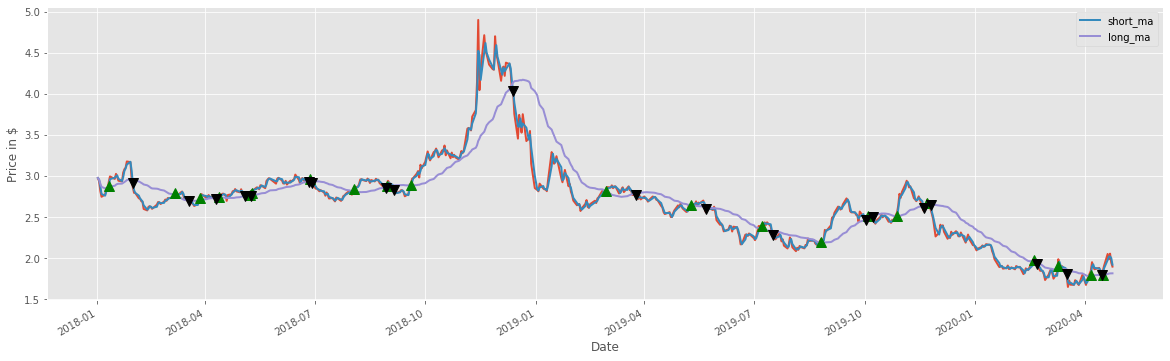

In [ ]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,6))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
NG['Settle'].plot(ax=ax1, lw=2.)

# Plot the short and long moving averages
signals[['short_ma', 'long_ma']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_ma[signals.positions == 1.0],
         '^', markersize=10, color='g')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_ma[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [ ]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['NG'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(trade_data['Settle'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(trade_data['Settle'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(trade_data['Settle'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
portfolio

<IPython.core.display.Javascript object>

,NG,holdings,cash,total,returns
Date,,,,,
2018-01-02,0.0,0.0,100000.0,100000.0,NaN
2018-01-03,0.0,0.0,100000.0,100000.0,0.000000
2018-01-04,0.0,0.0,100000.0,100000.0,0.000000
2018-01-05,0.0,0.0,100000.0,100000.0,0.000000
2018-01-08,0.0,0.0,100000.0,100000.0,0.000000
...,...,...,...,...,...
2020-04-20,204.9,204.9,99842.6,100047.5,0.000146
2020-04-21,198.4,198.4,99842.6,100041.0,-0.000065
2020-04-22,205.3,205.3,99842.6,100047.9,0.000069


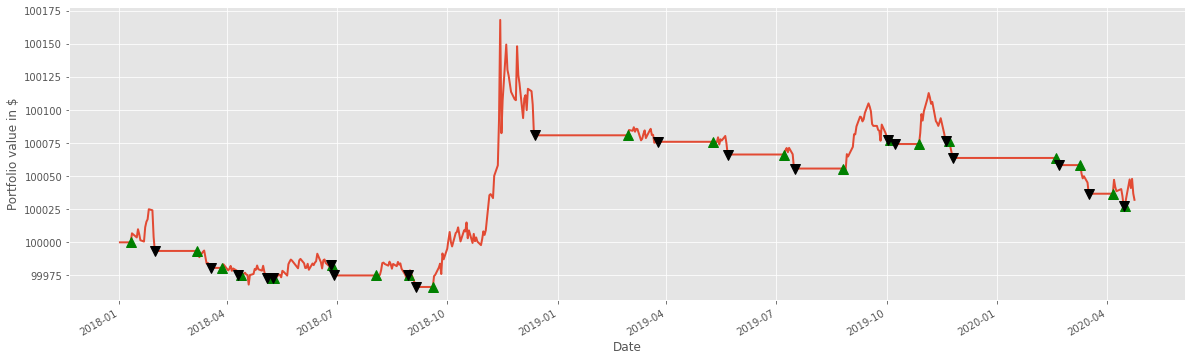

In [ ]:
# Create a figure
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='g')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(round(sharpe_ratio, 2))

<IPython.core.display.Javascript object>

0.12


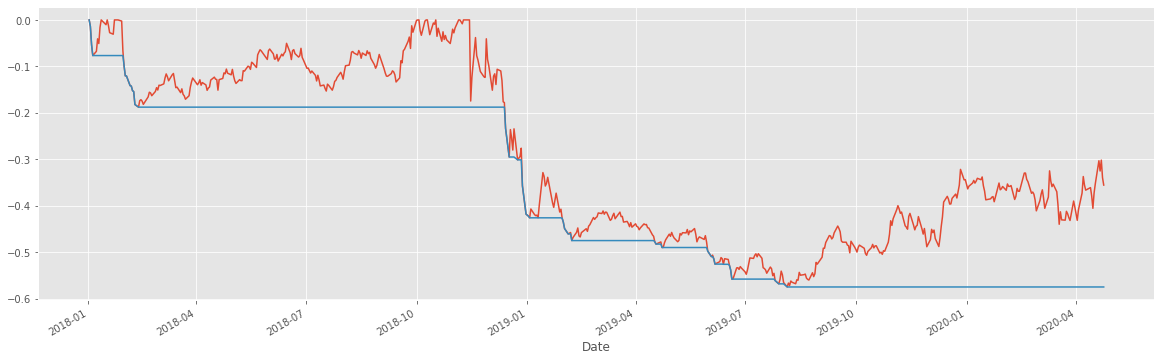

In [ ]:
# Create a figure
fig = plt.figure(figsize=(20,6))

# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = NG['Settle'].rolling(window, min_periods=1).max()
daily_drawdown = NG['Settle']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [ ]:
# Get the number of days in `aapl`
days = (NG.index[-1] - NG.index[0]).days

# Calculate the CAGR 
cagr = ((((NG['Settle'][-1]) / NG['Settle'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(round(cagr, 2))

-0.17
